<a href="https://colab.research.google.com/github/SanjayBukka/SMS-Spam-Detection/blob/main/Spam_SMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = "spam.csv"
data = pd.read_csv(file_path, encoding='latin-1')

In [ ]:
# review the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()
data.shape

Dataset Head:
      v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null 

(5572, 5)

In [ ]:
data = data.rename(columns={"v1": "Label", "v2": "Message"})

In [ ]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Label            0
Message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [ ]:
# Class distribution
print("\nClass Distribution:\n", data["Label"].value_counts())


Class Distribution:
 Label
ham     4825
spam     747
Name: count, dtype: int64


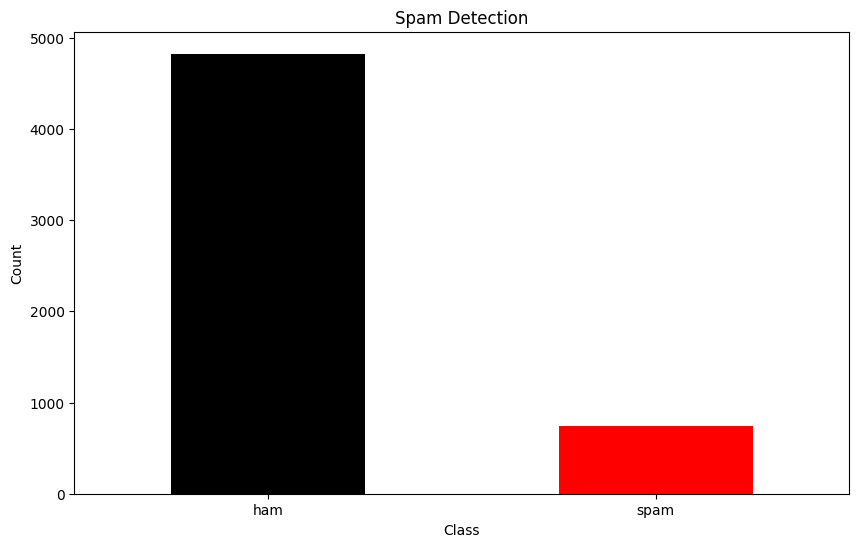

In [ ]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
data["Label"].value_counts().plot(kind="bar", color=["black", "red"])
plt.title("Spam Detection")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

CLEANING THE DATASET


In [ ]:
# Drop unnecessary columns
data = data[["Label", "Message"]]
print("Cleaned Dataset Preview:\n", data.head())


Cleaned Dataset Preview:
   Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# Remove duplicates
data = data.drop_duplicates()
print("After Removing Duplicates: ", data.shape)


After Removing Duplicates:  (5169, 2)


In [ ]:
# Convert labels to binary
data["Label"] = data["Label"].map({"ham": 0, "spam": 1})
print("Label Conversion:\n", data.head())

Label Conversion:
    Label                                            Message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


TEXT CLEANING

  lower case

  punctuation

  stopwords

  tokenization
  
  lemmatization


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = [word for word in text.split() if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

data["Cleaned_Message"] = data["Message"].apply(clean_text)
print("Cleaned Message Example:\n", data[["Message", "Cleaned_Message"]].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Cleaned Message Example:
                                              Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     Cleaned_Message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  


CLASS IMBALANCE


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = data["Cleaned_Message"]
y = data["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
data.head()

,Label,Message,Cleaned_Message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


Class Counts:
 Label
0    4516
1     653
Name: count, dtype: int64

Class Proportions:
 Label
0    0.87367
1    0.12633
Name: count, dtype: float64


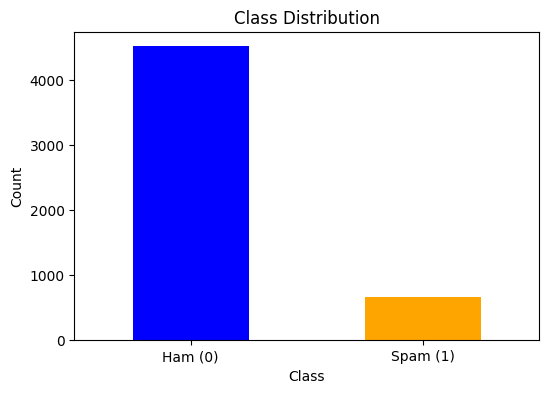

In [ ]:
class_counts = data["Label"].value_counts()
print("Class Counts:\n", class_counts)

class_proportions = class_counts / len(data)
print("\nClass Proportions:\n", class_proportions)

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar", color=["blue", "orange"])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Ham (0)", "Spam (1)"], rotation=0)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = data["Cleaned_Message"]
y = data["Label"]

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

from collections import Counter
print("Class Distribution After SMOTE:\n", Counter(y_train_smote))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class Distribution After SMOTE:
 Counter({0: 3613, 1: 3613})


MODEL BUILDING


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       903
           1       0.83      0.94      0.88       131

    accuracy                           0.97      1034
   macro avg       0.91      0.96      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.92      0.91      0.91       131

    accuracy                           0.98      1034
   macro avg       0.95      0.95      0.95      1034
weighted avg       0.98      0.98      0.98      1034



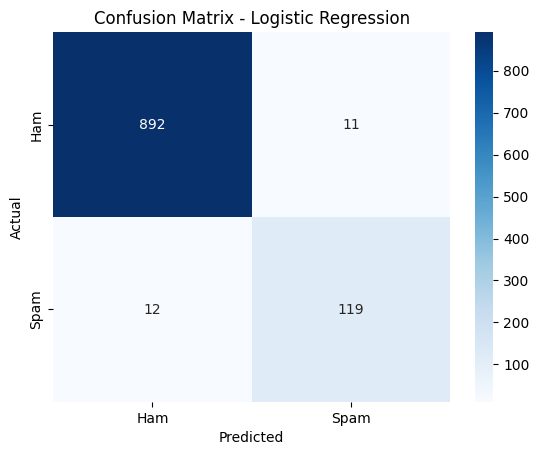

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_smote, y_train_smote)
y_pred_nb = nb_model.predict(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)
y_pred_lr = lr_model.predict(X_test)

# Evaluate Models
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


 Support Vector Machines (SVM)

 Hyperparameter Tuning

 Error Analysis

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.92      0.92      0.92       131

    accuracy                           0.98      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



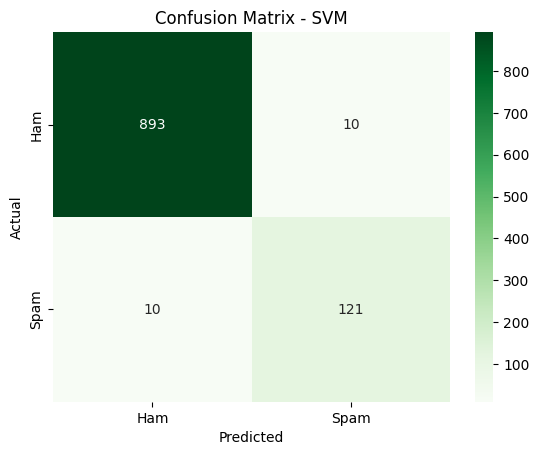

In [ ]:
from sklearn.svm import SVC

# Train SVM with a linear kernel
svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train_smote, y_train_smote)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix - SVM")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
